In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/Ras Kucing/Data Ras Kucing')

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, rotation_range=20,
                             width_shift_range=0.1, height_shift_range=0.2,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_generator = datagen.flow_from_directory(data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical',subset='training')
val_generator = datagen.flow_from_directory(data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation')

Found 1280 images belonging to 8 classes.
Found 320 images belonging to 8 classes.


In [ ]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

vgg_base.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
history = model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
40/40 [==============================] - 982s 24s/step - loss: 1.9083 - accuracy: 0.3000 - val_loss: 1.4044 - val_accuracy: 0.5312
Epoch 2/20
40/40 [==============================] - 955s 24s/step - loss: 1.3432 - accuracy: 0.5234 - val_loss: 1.1082 - val_accuracy: 0.6125
Epoch 3/20
40/40 [==============================] - 971s 24s/step - loss: 1.1656 - accuracy: 0.5852 - val_loss: 0.9875 - val_accuracy: 0.6625
Epoch 4/20
40/40 [==============================] - 961s 24s/step - loss: 1.0445 - accuracy: 0.6266 - val_loss: 0.8836 - val_accuracy: 0.7063
Epoch 5/20
40/40 [==============================] - 937s 24s/step - loss: 0.9464 - accuracy: 0.6477 - val_loss: 0.8730 - val_accuracy: 0.6844
Epoch 6/20
40/40 [==============================] - 935s 23s/step - loss: 0.8519 - accuracy: 0.7016 - val_loss: 0.9233 - val_accuracy: 0.6344
Epoch 7/20
40/40 [==============================] - 941s 24s/step - loss: 0.8357 - accuracy: 0.6891 - val_loss: 0.8052 - val_accuracy: 0.7094
Epoch 

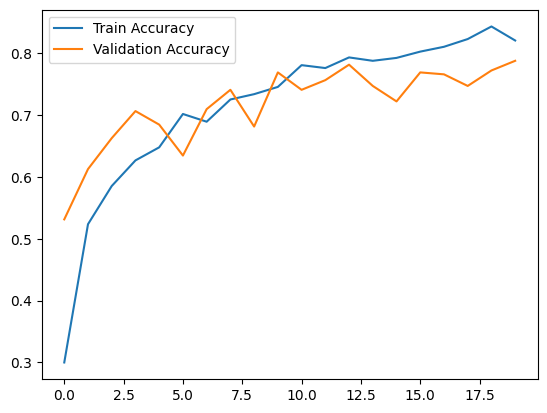

In [7]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])

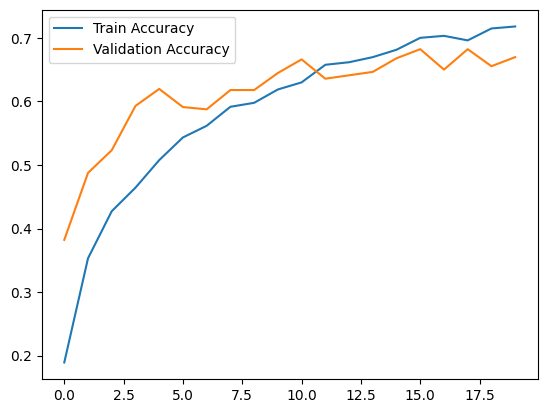

In [ ]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])

10/10 [==============================] - 189s 19s/step - loss: 0.5824 - accuracy: 0.7781
Validation Loss: 0.5823685526847839
Validation Accuracy: 0.778124988079071
10/10 [==============================] - 187s 18s/step


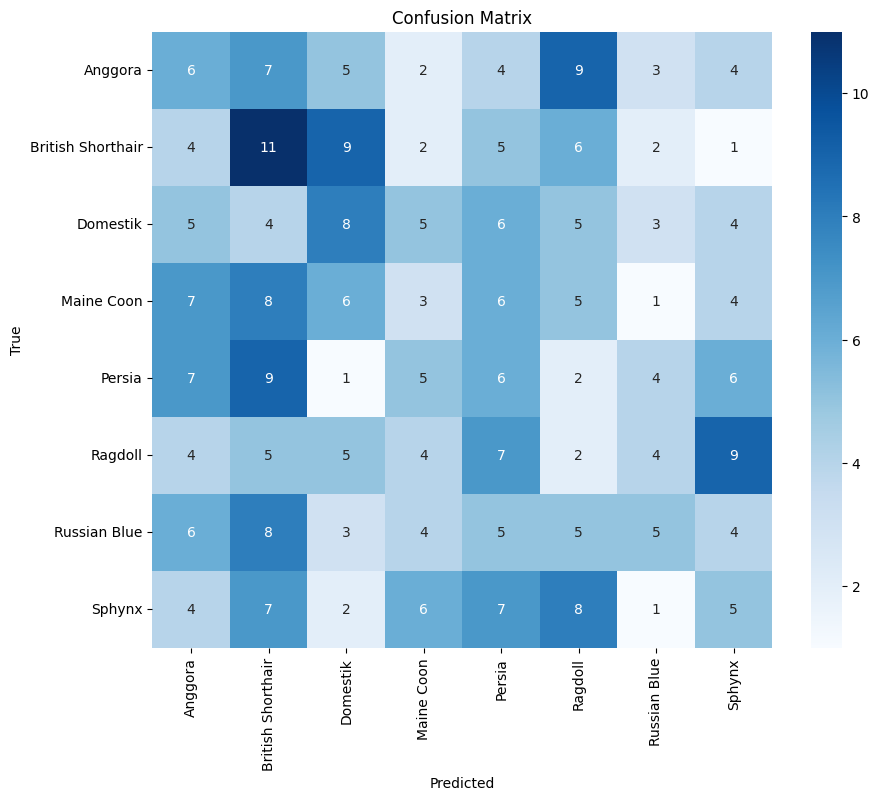

                   precision    recall  f1-score   support

          Anggora       0.14      0.15      0.14        40
British Shorthair       0.19      0.28      0.22        40
         Domestik       0.21      0.20      0.20        40
       Maine Coon       0.10      0.07      0.08        40
           Persia       0.13      0.15      0.14        40
          Ragdoll       0.05      0.05      0.05        40
     Russian Blue       0.22      0.12      0.16        40
           Sphynx       0.14      0.12      0.13        40

         accuracy                           0.14       320
        macro avg       0.14      0.14      0.14       320
     weighted avg       0.14      0.14      0.14       320



In [15]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

class_labels = list(val_generator.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

In [20]:
from keras.preprocessing.image import load_img, img_to_array

def predict_image(img):
  img = load_img(img, target_size=(224, 224))
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  input_arr = img_to_array(img)
  input_arr = np.array([input_arr])
  prediction = model.predict(input_arr)[0]
  class_indices = {v: k for k, v in train_generator.class_indices.items()}
  max_index = np.argmax(prediction)
  result = {class_indices[max_index]: float(prediction[max_index])}
  return result

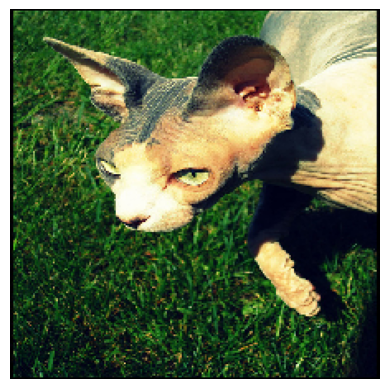

1/1 [==============================] - 1s 859ms/step


{'Sphynx': 1.0}

In [31]:
predict_image('/content/drive/MyDrive/Colab Notebooks/Ras Kucing/Data Ras Kucing/Sphynx/Sphynx_110.jpg')

In [8]:
model.save("Model4VGG RasKucing.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
model.save("Model4VGG RasKucing.keras")